<a href="https://colab.research.google.com/github/annamallarakesh-cmyk/IPL-2025-analysis/blob/main/bot_demo_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q pandasai openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.4/334.4 kB 38.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.7.1 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you

In [14]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI


In [13]:
from google.colab import files
import io

uploaded = files.upload()

# Show the actual uploaded filename
print(uploaded.keys())

# Pick the correct filename dynamically
filename = list(uploaded.keys())[0]   # gets the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.drop_duplicates(inplace=True)

# OR, remove duplicates only based on 'Players' column (keeping the first occurrence)
df.drop_duplicates(subset=['Players'], inplace=True)

# To reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

df.head()
# Find player(s) with max Sold value
max_sold = df["Sold"].max()
costliest_players = df[df["Sold"] == max_sold][["Players", "Team", "Sold"]]

print(costliest_players)


Saving ipl_2025_auction_players.csv to ipl_2025_auction_players (8).csv
dict_keys(['ipl_2025_auction_players (8).csv'])
               Players Team    Sold
64        David Warner    -  Unsold
72      Jonny Bairstow    -  Unsold
88    Waqar Salamkheil    -  Unsold
91          Yash Dhull    -  Unsold
95    Anmolpreet Singh    -  Unsold
..                 ...  ...     ...
569       Sanjay Yadav    -  Unsold
577        Umang Kumar    -  Unsold
588  Digvijay Deshmukh    -  Unsold
610         Yash Dabas    -  Unsold
612   Khrievitso Kense    -  Unsold

[102 rows x 3 columns]


In [12]:
from google.colab import files
import io

uploaded = files.upload()

# Show the actual uploaded filename
print(uploaded.keys())

# Pick the correct filename dynamically
filename = list(uploaded.keys())[0]   # gets the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Find the minimum Sold price
min_sold = df["Sold"].min()

# Get the players and teams with that minimum Sold price
cheapest_players = df[df["Sold"] == min_sold][["Players", "Team", "Sold"]]

print("Cheapest buys this season:")
print(cheapest_players)


Saving ipl_2025_auction_players.csv to ipl_2025_auction_players (7).csv
dict_keys(['ipl_2025_auction_players (7).csv'])
Cheapest buys this season:
                    Players  Team  Sold
96            Atharva Taide   SRH  0.30
105          Nishant Sindhu    GT  0.30
107             Aryan Juyal   LSG  0.30
110              Anuj Rawat    GT  0.30
111         Luvnith Sisodia   KKR  0.30
123           Shreyas Gopal   CSK  0.30
124         Mayank Markande   KKR  0.30
127         Kumar Kartikeya    RR  0.30
128            Manav Suthar    GT  0.30
163         Swastik Chikara   RCB  0.30
168           Shaik Rasheed   CSK  0.30
169            Himmat Singh   LSG  0.30
173        Darshan Nalkande    DC  0.30
183     Kunal Singh Rathore    RR  0.30
186        Mukesh Choudhary   CSK  0.30
191         Arjun Tendulkar    MI  0.30
196           Digvesh Singh   LSG  0.30
238             Sachin Baby   SRH  0.30
240           Harnoor Singh  PBKS  0.30
243        C Andre Siddarth   CSK  0.30
248  Rajvardh

Saving ipl_2025_auction_players.csv to ipl_2025_auction_players (13).csv


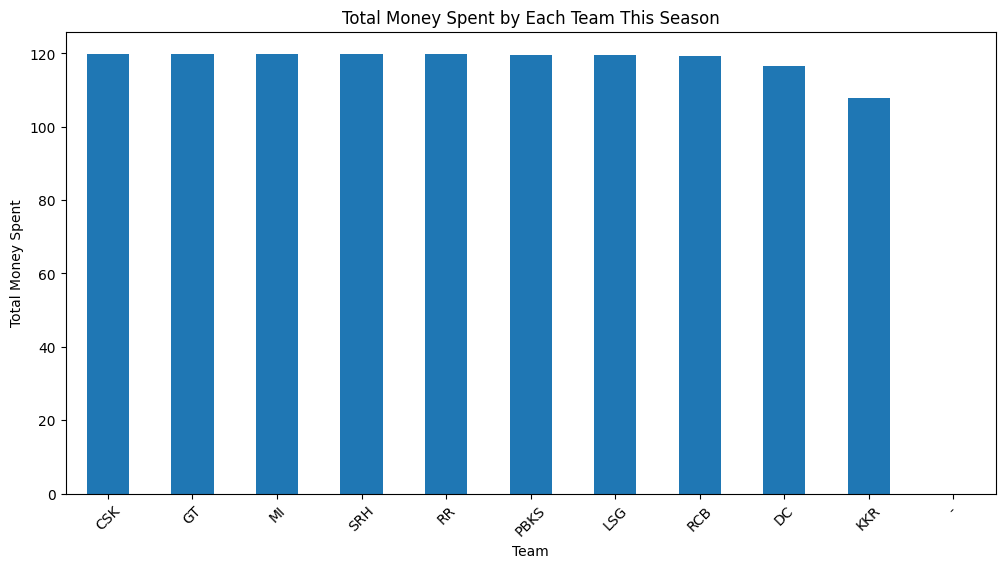

In [19]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Upload file
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Clean 'Sold' column
df["Sold"] = df["Sold"].replace("-", np.nan)  # replace dash with NaN
df["Sold"] = pd.to_numeric(df["Sold"], errors="coerce")  # convert to float

# Group by team and sum
team_spending = df.groupby("Team")["Sold"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
team_spending.plot(kind="bar")

plt.title("Total Money Spent by Each Team This Season")
plt.xlabel("Team")
plt.ylabel("Total Money Spent")
plt.xticks(rotation=45)
plt.show()


In [23]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Upload file
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

bowlers = df[df["Type"].str.upper() == "BOWLER"]

# Filter only bowlers
bowlers = df[df["Type"].str.upper() == "BOWL"].copy()

# 1. Count unsold bowlers
unsold_bowlers = bowlers[bowlers["Sold"].str.upper() == "UNSOLD"]
count_unsold_bowlers = unsold_bowlers.shape[0]

# 2. Sold bowlers (numeric values in 'Sold')
sold_bowlers = bowlers[bowlers["Sold"].str.upper() != "UNSOLD"].copy()
sold_bowlers["Sold"] = pd.to_numeric(sold_bowlers["Sold"], errors="coerce")

# Best (highest) and cheapest (lowest) sold prices
best_sold_price = sold_bowlers["Sold"].max()
cheapest_sold_price = sold_bowlers["Sold"].min()

# Get player(s) with best and cheapest price
best_sold_bowlers = sold_bowlers[sold_bowlers["Sold"] == best_sold_price][["Players", "Sold"]]
cheapest_sold_bowlers = sold_bowlers[sold_bowlers["Sold"] == cheapest_sold_price][["Players", "Sold"]]

print("Number of unsold bowlers:", count_unsold_bowlers)
print("\nUnsold bowlers with base price:")
print(unsold_bowlers[["Players", "Base"]])

print("\nBest sold bowler(s):")
print(best_sold_bowlers)

print("\nCheapest sold bowler(s):")
print(cheapest_sold_bowlers)


Saving ipl_2025_auction_players.csv to ipl_2025_auction_players (17).csv
Number of unsold bowlers: 44

Unsold bowlers with base price:
                    Players  Base
88         Waqar Salamkheil  0.75
120            Kartik Tyagi  0.30
122           Piyush Chawla  0.50
157            Akeal Hosein  1.50
158          Keshav Maharaj  0.75
159        Mujeeb Ur Rahman  2.00
160             Adil Rashid  2.00
161  Vijayakanth Viyaskanth  0.75
187           Sakib Hussain  0.30
188       Vidwath Kaverappa  0.30
189             Rajan Kumar  0.30
193        Prince Choudhary  0.30
197        Prashant Solanki  0.30
198  Jhathavedh Subramanyan  0.30
226       Mustafizur Rahman  2.00
229           Naveen-ul-Haq  2.00
231             Umesh Yadav  2.00
232          Rishad Hossain  0.75
268          Murugan Ashwin  0.30
271            Raghav Goyal  0.30
274      Bailapudi Yeswanth  0.30
298         Richard Gleeson  0.75
300          Alzarri Joseph  2.00
305               Luke Wood  0.75
332           A

In [24]:
from google.colab import files
import io
import pandas as pd
import numpy as np

# Upload file
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Count total unsold players
unsold_players = df[df["Sold"].str.upper() == "UNSOLD"]
count_unsold_players = unsold_players.shape[0]

print("Total number of players remained unsold this season:", count_unsold_players)


Saving ipl_2025_auction_players.csv to ipl_2025_auction_players (18).csv
Total number of players remained unsold this season: 103
